# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#calling weather api

url= "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='

#lists to store data
data_citynames= []
data_lat=[]
data_lng=[]
data_temp=[]
data_windspeed=[]
data_humidity=[]
data_cloudiness=[]
data_date=[]
data_country=[]

count=1

print('_ _ _ _ _')
print('Beginning Data Retrival Process')
print('_ _ _ _ _')

for city in cities:
    count +=1
    try:
        response=requests.get(query_url + city).json()
        print (f'#{count}:{city}')
        

        data_citynames.append(response['name'])
        data_lat.append(response['coord']['lat'])
        data_lng.append(response['coord']['lon'])
        data_temp.append(response['main']['temp_max'])
        data_humidity.append(response['main']['humidity'])
        data_cloudiness.append(response['clouds']['all'])
        data_windspeed.append(response['wind']['speed'])
        data_country.append(response['sys']['country'])
        data_date.append(response['dt'])
    
    except:
        print (f"{city} not found")


_ _ _ _ _
Beginning Data Retrival Process
_ _ _ _ _
#2:lac du bonnet
#3:rikitea
#4:punta arenas
#5:kaliua
#6:cape town
#7:leningradskiy
#8:hasaki
#9:mataura
#10:charters towers
#11:vao
#12:hermanus
#13:port alfred
#14:ushuaia
#15:road town
#16:arraial do cabo
#17:sulangan
#18:kaeng khlo
kaeng khlo not found
#19:mys shmidta
mys shmidta not found
#20:khatanga
#21:port elizabeth
#22:saskylakh
#23:dauphin
#24:samusu
samusu not found
#25:basse
#26:qui nhon
#27:kapaa
#28:skala
#29:kasempa
#30:kidal
#31:hilo
#32:cherskiy
#33:vaini
#34:mar del plata
#35:buala
#36:new norfolk
#37:grand river south east
grand river south east not found
#38:berlevag
#39:yellowknife
#40:carman
#41:burica
burica not found
#42:clyde river
#43:cheyenne
#44:ihosy
#45:plouzane
#46:busselton
#47:hayvoron
#48:maceio
#49:katsuura
#50:adrar
#51:bluff
#52:oranjestad
#53:bam
#54:sao miguel do araguaia
#55:pemangkat
#56:belyy yar
#57:denpasar
#58:iqaluit
#59:kutum
#60:huangpi
#61:dikson
#62:albany
#63:salalah
#64:palabuhanrat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create a dictionary with the lists to create a data frame
dictionary_forDF= {
    'City': data_citynames,
    'Lat': data_lat,
    'Lng':data_lng,
    'Max Temp':data_temp,
    'Humidity':data_humidity,
    'Cloudiness':data_cloudiness,
    'Wind Speed':data_windspeed,
    'Country':data_country,
    'Date':data_date
}

weather_df= pd.DataFrame(dictionary_forDF)

weather_df.to_csv(output_data_file, index= False, header=True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lac du Bonnet,50.2536,-96.0612,66.85,45,90,5.48,CA,1632097829
1,Rikitea,-23.1203,-134.9692,74.08,76,14,11.52,PF,1632097830
2,Punta Arenas,-53.1500,-70.9167,41.11,81,20,18.41,CL,1632097830
3,Kaliua,-5.0606,31.7936,68.90,30,68,5.79,TZ,1632097831
4,Cape Town,-33.9258,18.4232,58.87,86,75,1.99,ZA,1632097777


In [5]:
#we can get the statistical summary table
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,18.344069,15.622471,65.085017,72.278547,53.531142,7.899671,1.632098e+09
std,33.146283,90.744869,16.141095,19.615902,41.016840,5.559312,9.310688e+01
min,-54.800000,-179.166700,11.030000,9.000000,0.000000,0.000000,1.632098e+09
25%,-8.604175,-64.339050,53.422500,62.000000,7.000000,3.565000,1.632098e+09
50%,19.556450,18.902050,67.505000,77.000000,66.000000,6.665000,1.632098e+09
75%,47.880125,99.686825,79.000000,87.000000,99.000000,11.210000,1.632098e+09
max,78.218600,179.316700,94.420000,100.000000,100.000000,27.160000,1.632098e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df= weather_df.sort_values(['Humidity'])
weather_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
29,Mar del Plata,-38.0023,-57.5575,55.42,100,90,8.05,AR,1632097841
404,Punta Alta,-38.8759,-62.0736,54.37,100,75,8.05,AR,1632097999
450,Fenoarivo,-18.9330,47.4354,53.67,100,75,5.75,MG,1632098019
315,Ixtapa,20.7000,-105.2000,76.23,100,90,2.30,MX,1632097943
314,Grindavik,63.8424,-22.4338,52.27,100,90,23.02,IS,1632097751


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

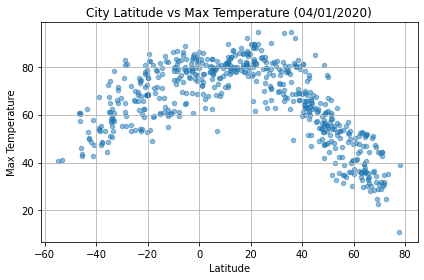

Ecuador's latitude is 0, from this graph we can see that temperatures around 0 (latitude = +/- 20) are more consistent and on the hotter side, as we move further away from the Ecuator it gets colder on both directions. 


In [18]:
#plot for City Latitude vs Max Temperature on 4/01/20
on_date= '(04/01/2020)'

weather_df.plot.scatter(
    x='Lat',y= 'Max Temp', grid= True, alpha= 0.5,
    title= f'City Latitude vs Max Temperature {on_date}'
)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.tight_layout()
plt.show()

print("Ecuador's latitude is 0, from this graph we can see that temperatures around 0 (latitude = +/- 20) are more consistent and on the hotter side, as we move further away from the Ecuator it gets colder on both directions. ") 




## Latitude vs. Humidity Plot

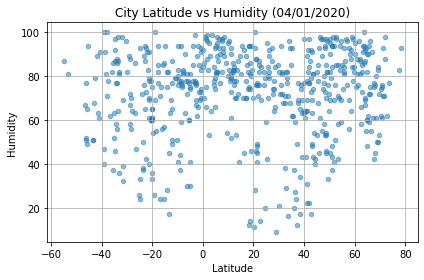

From this graph we can see that Humidity does not have a pattern as it gets closer to the Ecuator.


In [19]:
#plot for City Latitude vs Humidity on 4/01/20

weather_df.plot.scatter(
    x='Lat',y= 'Humidity', grid= True, alpha= 0.5,
    title= f'City Latitude vs Humidity {on_date}'
)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.show()

print("From this graph we can see that Humidity does not have a pattern as it gets closer to the Ecuator.")

## Latitude vs. Cloudiness Plot

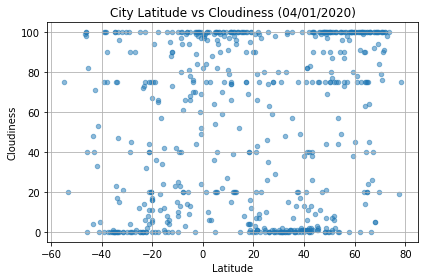

From this graph we cannot see any patterns of Cloudiness as we get closer to the Ecuator


In [20]:
#plot for City Latitude vs Cloudiness on 4/01/20

weather_df.plot.scatter(
    x='Lat',y= 'Cloudiness', grid= True, alpha= 0.5,
    title= f'City Latitude vs Cloudiness {on_date}'
)

plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.tight_layout()
plt.show()

print("From this graph we cannot see any patterns of Cloudiness as we get closer to the Ecuator")

## Latitude vs. Wind Speed Plot

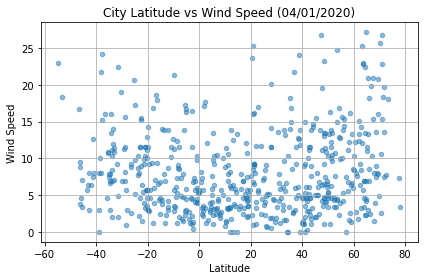

From this graph we cannot see any patterns of Wind speed as we get closer to the Ecuator


In [21]:
#plot for City Latitude vs Wind Speed on 4/01/20
on_date= '(04/01/2020)'

weather_df.plot.scatter(
    x='Lat',y= 'Wind Speed', grid= True, alpha= 0.5,
    title= f'City Latitude vs Wind Speed {on_date}'
)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()
plt.show()

print("From this graph we cannot see any patterns of Wind speed as we get closer to the Ecuator")

## Linear Regression

In [11]:
northernH_df = weather_df[weather_df['Lat']>0]
southernH_df = weather_df[weather_df['Lat']<0]

#The next graphs are specific for the northen or southern hemisphere so we split at latitude = 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

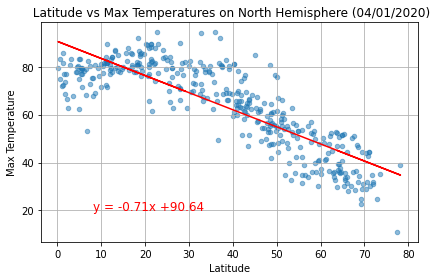

In [16]:
northernH_df.plot.scatter(
    x='Lat',y= 'Max Temp', grid= True, alpha= 0.5, title=f' Latitude vs Max Temperatures on North Hemisphere {on_date}'
)
(slope, intercept, rvalue, _, _) = linregress(northernH_df['Lat'],northernH_df['Max Temp'])
fit = slope*northernH_df['Lat']+intercept
plt.plot(northernH_df['Lat'], fit ,"-", color = "red")
plt.annotate(f'y = {round(slope, 2)}x +{round(intercept, 2)}', 
[8,20], color = 'red', fontsize = 12)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression